# importaciones necesarias

In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

# lectura de csv

In [579]:
df = pd.read_csv('./creditcardcsvpresent.csv')

In [580]:
df

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,NaN,500.0,11000.0,Y,0,N,N,754,585.0,7,N
3071,6661273532,NaN,800.0,0.0,Y,0,N,N,754,585.0,7,N
3072,6661273533,NaN,800.0,20800.0,Y,0,N,N,754,585.0,7,N
3073,6661273532,NaN,1500.0,12000.0,Y,0,Y,Y,754,585.0,7,N


# limpieza de columnas en null y mostras datos estadisticos de cada columna

In [581]:
def analyze_and_clean_df():
    # Eliminar columnas que no tienen datos
    df_cleaned = df.dropna(axis=1, how='all')
    
    # Recorrer cada columna para mostrar las estadísticas
    for col in df_cleaned.columns:
        print(f"\nEstadísticas para la columna '{col}':")
        data = df_cleaned[col]
        
        if pd.api.types.is_numeric_dtype(data):
            # Si la columna es numérica, mostrar estadísticas numéricas
            print(f"Máximo: {data.max()}")
            print(f"Mínimo: {data.min()}")
            print(f"Media: {data.mean()}")
            print(f"Mediana: {data.median()}")
            print(f"Primer cuartil (Q1): {data.quantile(0.25)}")
            print(f"Tercer cuartil (Q3): {data.quantile(0.75)}")
        else:
            # Si la columna es categórica, mostrar los valores más frecuentes
            print(f"Valores únicos: {data.unique()}")
            print(f"Valor más frecuente (Moda): {data.mode().values[0]}")
    
    return df_cleaned


In [582]:
df=analyze_and_clean_df()


Estadísticas para la columna 'Merchant_id':
Máximo: 6665906072
Mínimo: 3160040998
Media: 5026634409.556748
Mediana: 5025577967.0
Primer cuartil (Q1): 4170814222.5
Tercer cuartil (Q3): 5889625296.0

Estadísticas para la columna 'Average Amount/transaction/day':
Máximo: 2000.0
Mínimo: 4.011526884
Media: 515.0265563826592
Mediana: 502.5495754
Primer cuartil (Q1): 269.7880474
Tercer cuartil (Q3): 765.272803

Estadísticas para la columna 'Transaction_amount':
Máximo: 108000.0
Mínimo: 0.0
Media: 9876.399209818092
Mediana: 6698.891856
Primer cuartil (Q1): 2408.7811475
Tercer cuartil (Q3): 14422.568935

Estadísticas para la columna 'Is declined':
Valores únicos: ['N' 'Y']
Valor más frecuente (Moda): N

Estadísticas para la columna 'Total Number of declines/day':
Máximo: 20
Mínimo: 0
Media: 0.9573983739837398
Mediana: 0.0
Primer cuartil (Q1): 0.0
Tercer cuartil (Q3): 0.0

Estadísticas para la columna 'isForeignTransaction':
Valores únicos: ['Y' 'N']
Valor más frecuente (Moda): N

Estadísticas 

# listar colunmas categoricas

In [583]:
def list_and_print_categorical_columns():
    # Seleccionar columnas categóricas
    cat_cols = df.select_dtypes(include=[object]).columns
    
    if len(cat_cols) == 0:
        print("No hay columnas categóricas en el conjunto de datos.")
        return
    
    # Mostrar las categorías y frecuencias para cada columna categórica
    for col in cat_cols:
        print(f"\nCategorías y frecuencias para la columna '{col}':")
        frequencies = df[col].value_counts()
        for category, freq in frequencies.items():
            print(f"{category}: {freq}")

In [584]:
list_and_print_categorical_columns()


Categorías y frecuencias para la columna 'Is declined':
N: 3018
Y: 57

Categorías y frecuencias para la columna 'isForeignTransaction':
N: 2369
Y: 706

Categorías y frecuencias para la columna 'isHighRiskCountry':
N: 2870
Y: 205

Categorías y frecuencias para la columna 'isFradulent':
N: 2627
Y: 448


# matriz de correlacion


Matriz de correlación:
                                Merchant_id  Average Amount/transaction/day  \
Merchant_id                        1.000000                        0.018223   
Average Amount/transaction/day     0.018223                        1.000000   
Transaction_amount                 0.046065                        0.587111   
Total Number of declines/day      -0.016165                       -0.009682   
Daily_chargeback_avg_amt           0.088802                        0.060429   
6_month_avg_chbk_amt               0.091621                        0.060284   
6-month_chbk_freq                  0.118599                        0.071849   

                                Transaction_amount  \
Merchant_id                               0.046065   
Average Amount/transaction/day            0.587111   
Transaction_amount                        1.000000   
Total Number of declines/day              0.259309   
Daily_chargeback_avg_amt                  0.252298   
6_month_avg_chbk_am

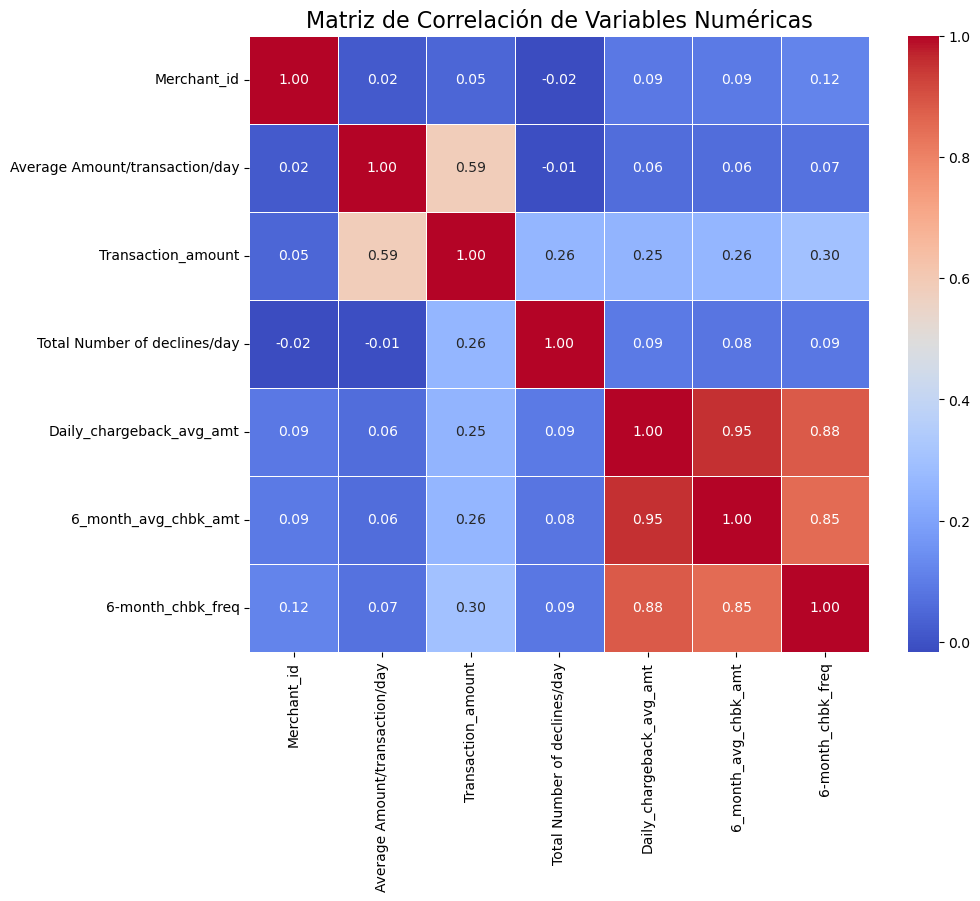

In [585]:
df_copy = df.copy()

# Seleccionar columnas numéricas
numeric_cols = df_copy.select_dtypes(include=[float, int]).columns

# Verificar y convertir valores no numéricos en columnas numéricas
for col in df_copy.columns:
    # Convertir columnas a numéricas y crear una nueva columna si es necesario
    df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

# Eliminar columnas con valores constantes
constant_cols = [col for col in df_copy.columns if df_copy[col].nunique() <= 1]
df_cleaned = df_copy.drop(columns=constant_cols)

# Seleccionar sólo columnas numéricas después de eliminar las constantes
df_cleaned = df_cleaned.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix_cleaned = df_cleaned.corr()

# Imprimir matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix_cleaned)

# Mostrar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

# tratamiento de missing

In [586]:
def handle_missing_values(method='media'):
    # Definir el nombre de la primera columna a evitar
    first_col = df.columns[0]
    
    # Seleccionar columnas numéricas, excepto la primera
    num_cols = df.select_dtypes(include=[np.number]).columns
    num_cols = [col for col in num_cols if col != first_col]

    # Seleccionar columnas categóricas, excepto la primera
    cat_cols = df.select_dtypes(include=[object]).columns
    cat_cols = [col for col in cat_cols if col != first_col]

    # Imputar valores faltantes en columnas numéricaså
    for col in num_cols:
        if method == 'media':
            value = df[col].mean()
            df.loc[:, col] = df[col].fillna(value)
            print(f"Valores faltantes imputados con la media ({value}) en la columna '{col}'.")
        elif method == 'mediana':
            value = df[col].median()
            df.loc[:, col] = df[col].fillna(value)
            print(f"Valores faltantes imputados con la mediana ({value}) en la columna '{col}'.")

    # Imputar valores faltantes en columnas categóricas
    for col in cat_cols:
        mode_value = df[col].mode()[0]
        df.loc[:, col] = df[col].fillna(mode_value)
        print(f"Valores faltantes imputados con la moda ({mode_value}) en la columna '{col}'.")

    # Mostrar estadísticas para columnas categóricas
    for col in cat_cols:
        missing_count = df[col].isnull().sum()
        print(f"Columna categórica '{col}':")
        print(f"   Moda: {df[col].mode()[0]}")
        print(f"   Valores faltantes: {missing_count}")
    
    return df

In [587]:
df=handle_missing_values()

Valores faltantes imputados con la media (515.0265563826592) en la columna 'Average Amount/transaction/day'.
Valores faltantes imputados con la media (9876.399209818092) en la columna 'Transaction_amount'.
Valores faltantes imputados con la media (0.9573983739837398) en la columna 'Total Number of declines/day'.
Valores faltantes imputados con la media (55.73756097560975) en la columna 'Daily_chargeback_avg_amt'.
Valores faltantes imputados con la media (40.02240650406504) en la columna '6_month_avg_chbk_amt'.
Valores faltantes imputados con la media (0.39186991869918697) en la columna '6-month_chbk_freq'.
Valores faltantes imputados con la moda (N) en la columna 'Is declined'.
Valores faltantes imputados con la moda (N) en la columna 'isForeignTransaction'.
Valores faltantes imputados con la moda (N) en la columna 'isHighRiskCountry'.
Valores faltantes imputados con la moda (N) en la columna 'isFradulent'.
Columna categórica 'Is declined':
   Moda: N
   Valores faltantes: 0
Columna ca

# deteccion de anomalias de todas las columnas, graficos de bigotes y distribucion

In [588]:
def anomalies(k=1.5):
    if df is not None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        
        if numeric_cols.empty:
            print("No hay columnas numéricas para la detección de anomalías.")
            return
        
        # Mostrar la distribución de 'Merchant_id'
        if 'Merchant_id' in df.columns:
            print("\nDistribución de 'Merchant_id':")
            print(df['Merchant_id'].describe())
        
        # Crear gráficos de bigotes para cada columna numérica
        for col in numeric_cols:
            if col == 'Merchant_id':
                continue  # Si 'Merchant_id' es una columna numérica, se excluye de los análisis de anomalías
            
            # Detectar anomalías
            detect_anomalies(col, k)

            # Crear gráfico de bigotes (boxplot)
            plt.figure(figsize=(12, 6))
            sns.boxplot(x=df[col])
            
            # Añadir línea de la media
            mean_value = df[col].mean()
            plt.axvline(mean_value, color='r', linestyle='--', label='Media')

            # Añadir marcador para la media
            plt.scatter(mean_value, 0, color='r', s=100, edgecolor='k', zorder=5, label='Centroide')

            plt.title(f'Gráfico de Bigotes para {col}')
            plt.xlabel(col)
            plt.legend()
            plt.show()

    else:
        print("No hay datos cargados.")

def detect_anomalies(col, k):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    anomalies = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\nNúmero de anomalías detectadas en la columna '{col}': {len(anomalies)}")
    
    # Mostrar estadísticas descriptivas de las anomalías
    print(f"Estadísticas de las anomalías en la columna '{col}':")
    print(anomalies[col].describe())

    # Mostrar el rango de anomalías
    plt.figure(figsize=(12, 6))
    plt.scatter(df.index, df[col], label='Datos')
    plt.scatter(anomalies.index, anomalies[col], color='red', label='Anomalías')
    plt.axhline(y=df[col].mean(), color='r', linestyle='--', label='Media')
    plt.title(f'Distribución de Anomalías para {col}')
    plt.xlabel('Índice')
    plt.ylabel(col)
    plt.legend()
    plt.show()


Distribución de 'Merchant_id':
count    3.075000e+03
mean     5.026634e+09
std      9.870778e+08
min      3.160041e+09
25%      4.170814e+09
50%      5.025578e+09
75%      5.889625e+09
max      6.665906e+09
Name: Merchant_id, dtype: float64

Número de anomalías detectadas en la columna 'Average Amount/transaction/day': 4
Estadísticas de las anomalías en la columna 'Average Amount/transaction/day':
count       4.0
mean     2000.0
std         0.0
min      2000.0
25%      2000.0
50%      2000.0
75%      2000.0
max      2000.0
Name: Average Amount/transaction/day, dtype: float64


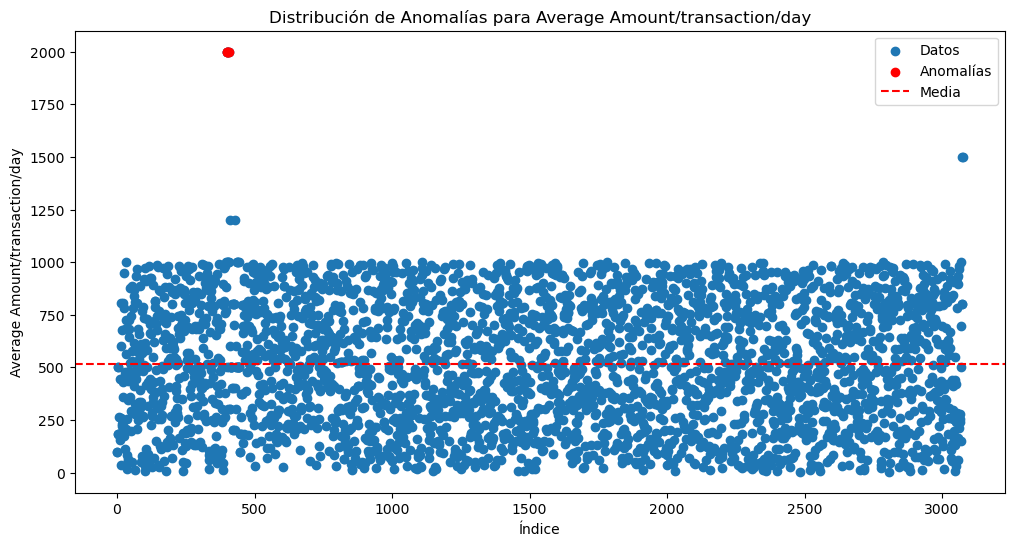

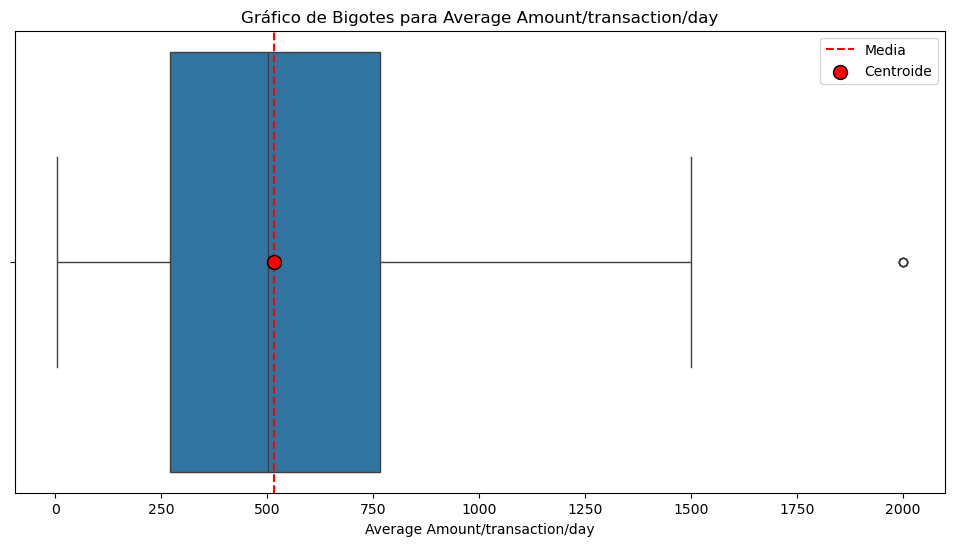


Número de anomalías detectadas en la columna 'Transaction_amount': 113
Estadísticas de las anomalías en la columna 'Transaction_amount':
count       113.000000
mean      43344.061014
std       11214.910277
min       32507.864620
25%       37124.299200
50%       40800.000000
75%       46102.219200
max      108000.000000
Name: Transaction_amount, dtype: float64


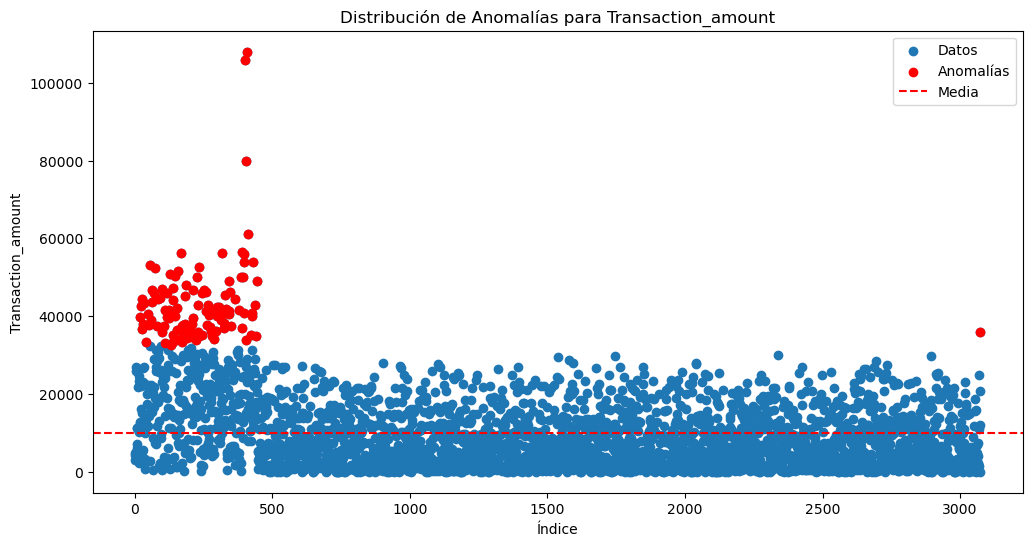

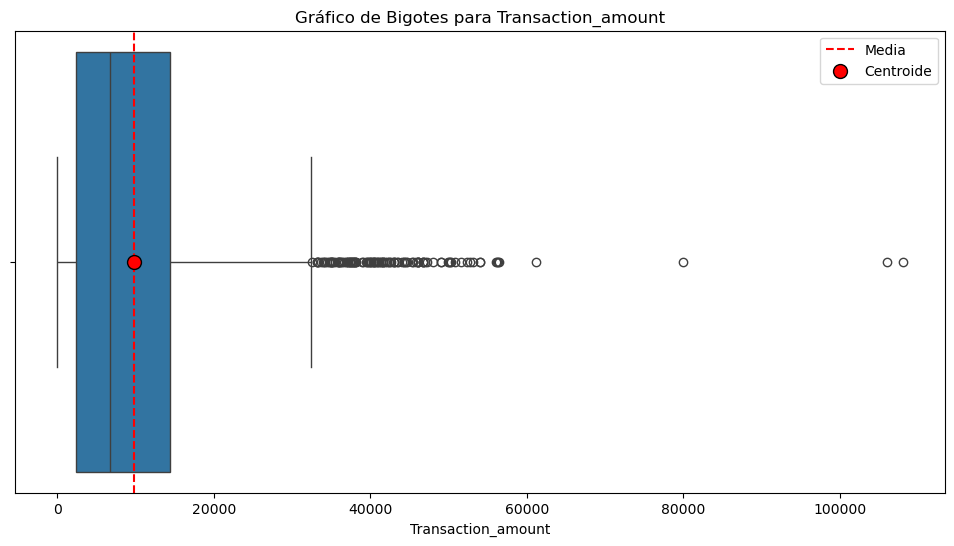


Número de anomalías detectadas en la columna 'Total Number of declines/day': 691
Estadísticas de las anomalías en la columna 'Total Number of declines/day':
count    691.000000
mean       4.260492
std        2.705633
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       20.000000
Name: Total Number of declines/day, dtype: float64


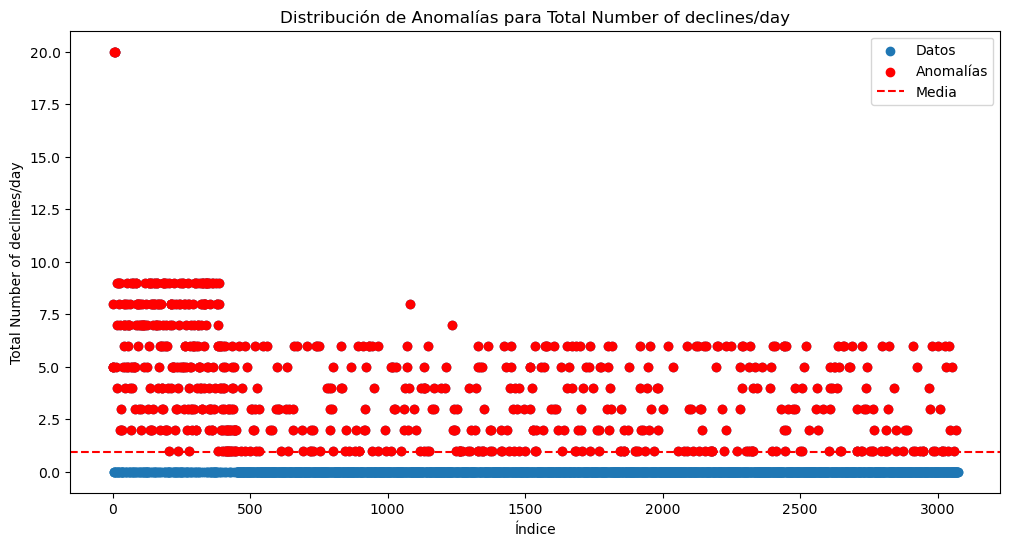

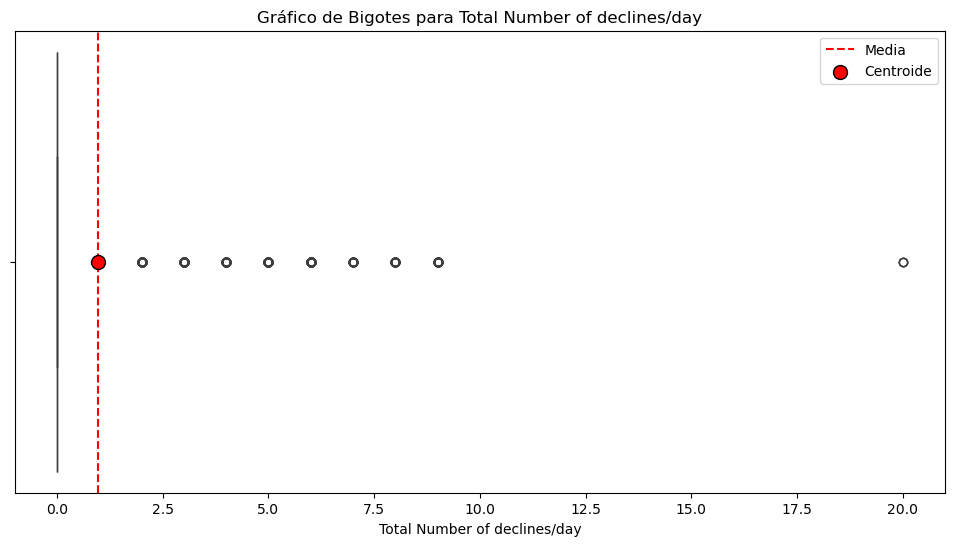


Número de anomalías detectadas en la columna 'Daily_chargeback_avg_amt': 218
Estadísticas de las anomalías en la columna 'Daily_chargeback_avg_amt':
count    218.000000
mean     786.206422
std      167.059052
min      183.000000
25%      754.000000
50%      756.500000
75%      926.750000
max      998.000000
Name: Daily_chargeback_avg_amt, dtype: float64


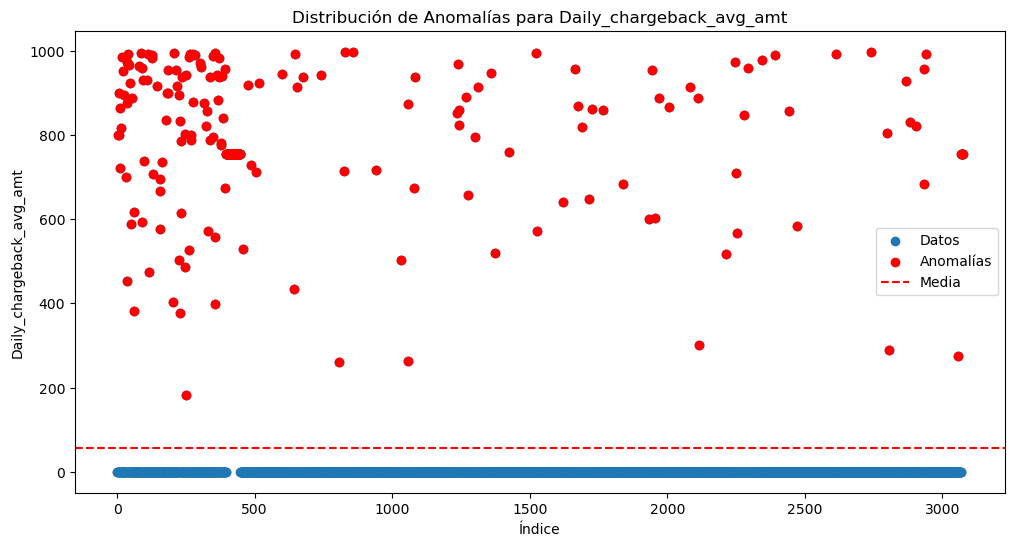

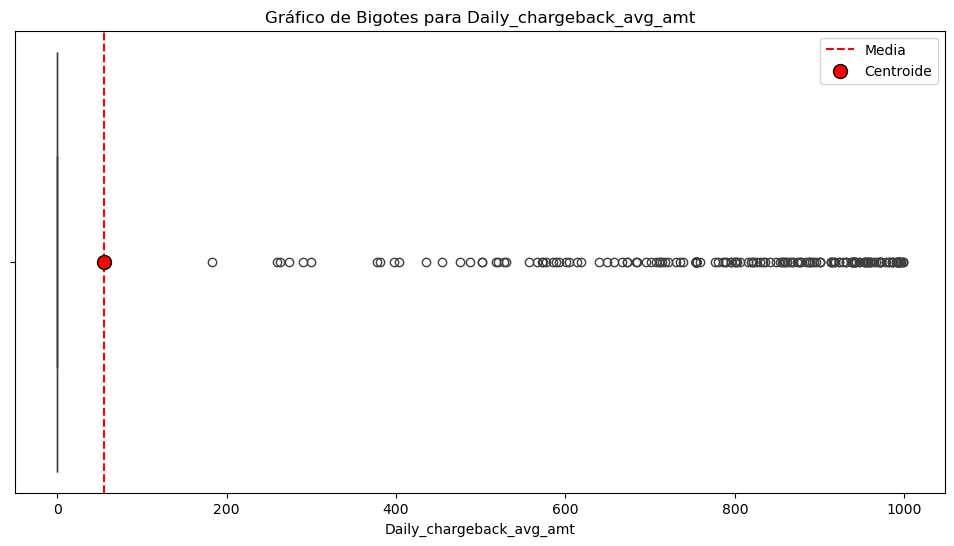


Número de anomalías detectadas en la columna '6_month_avg_chbk_amt': 218
Estadísticas de las anomalías en la columna '6_month_avg_chbk_amt':
count    218.000000
mean     564.536239
std      217.099024
min      101.000000
25%      413.500000
50%      585.000000
75%      713.250000
max      998.000000
Name: 6_month_avg_chbk_amt, dtype: float64


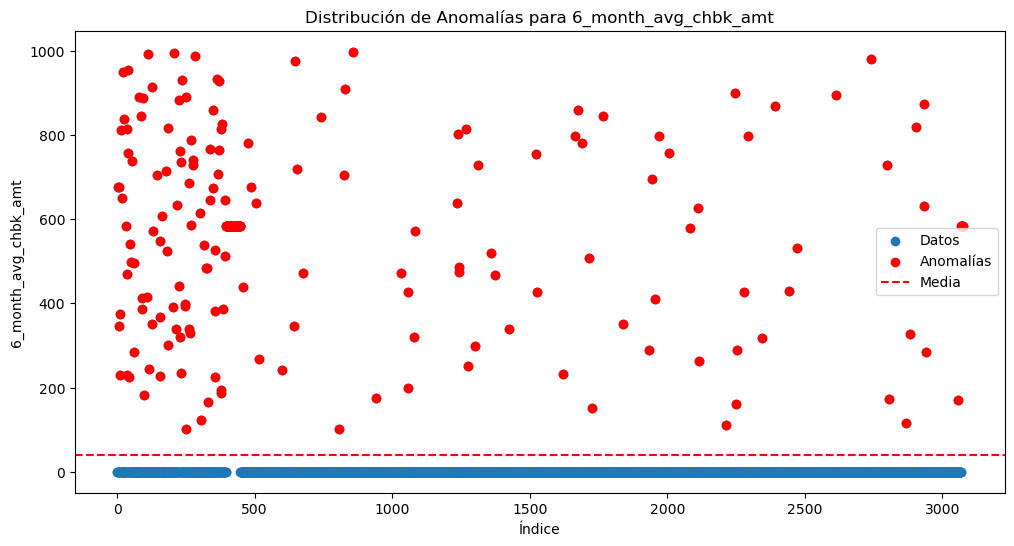

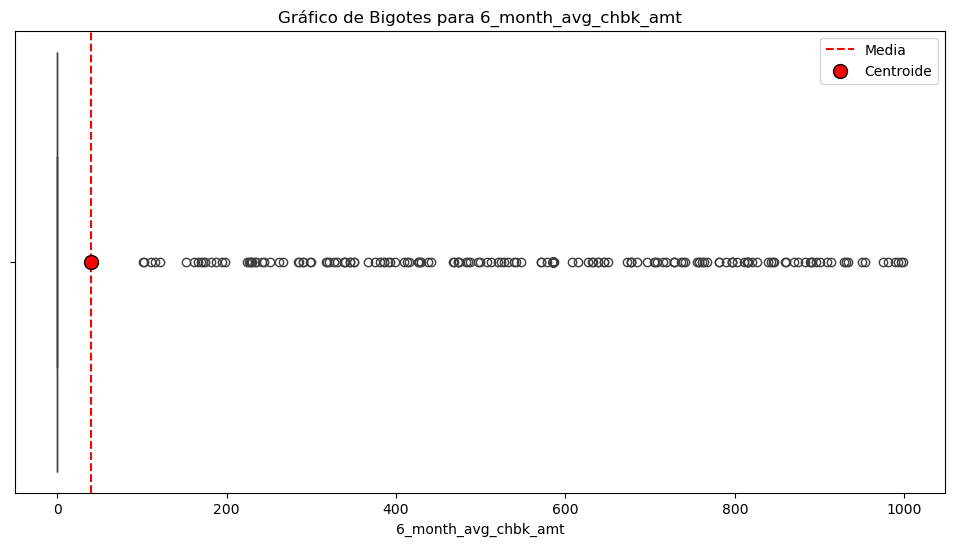


Número de anomalías detectadas en la columna '6-month_chbk_freq': 218
Estadísticas de las anomalías en la columna '6-month_chbk_freq':
count    218.000000
mean       5.527523
std        2.334212
min        1.000000
25%        4.000000
50%        7.000000
75%        7.000000
max        9.000000
Name: 6-month_chbk_freq, dtype: float64


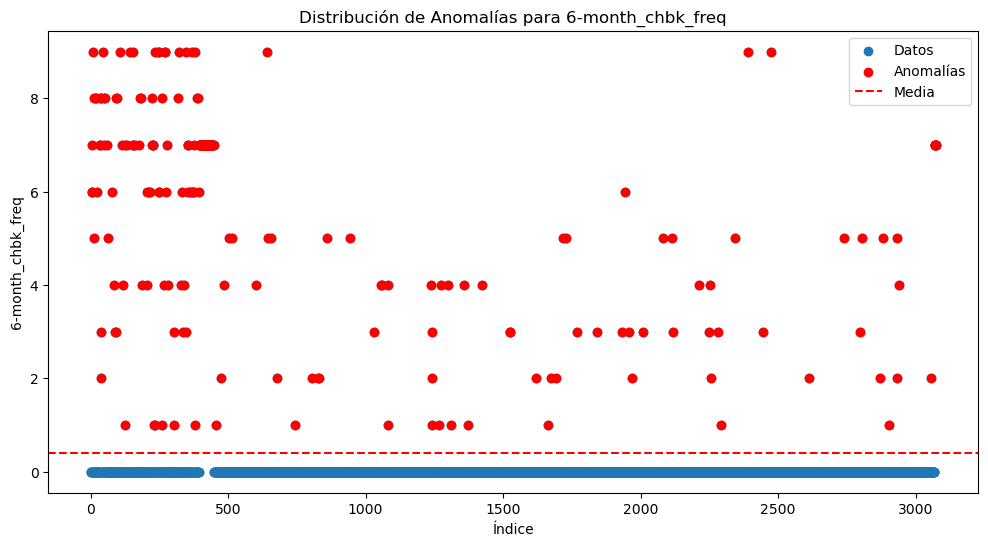

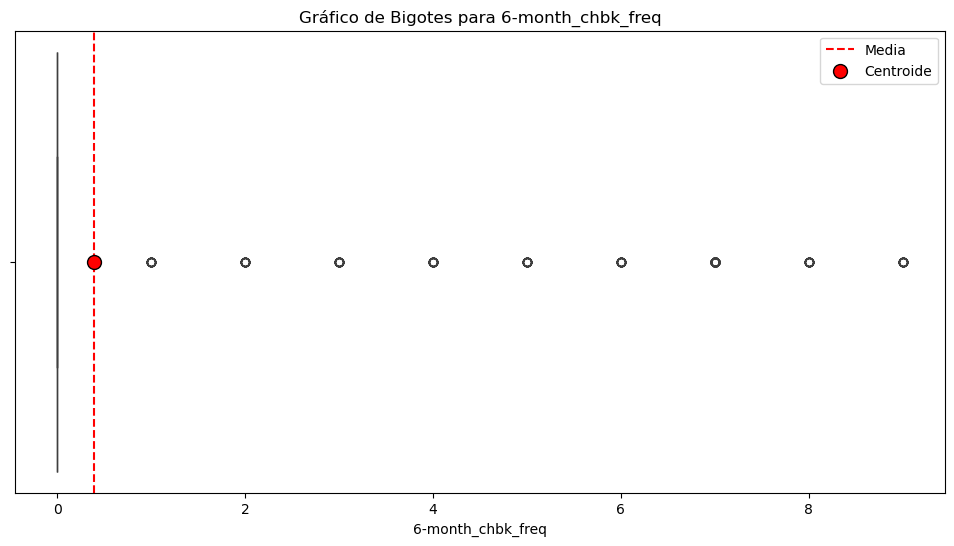

In [589]:
anomalies()

# quitar la columna merchand_id y convertir las columnas categoricas

In [590]:
def convert_and_clean_data():
    columns = df.columns[1:]  # Excluir la primera columna si es 'Merchant_id'
    data_for_clustering = df[columns].copy()  # Hacer una copia del DataFrame

    # Identificar columnas no numéricas automáticamente
    non_numeric_cols = data_for_clustering.select_dtypes(exclude=['number']).columns

    # Convertir las columnas categóricas a formato numérico
    mapping = {'Y': 1, 'N': 0}
    for col in non_numeric_cols:
        if set(data_for_clustering[col].unique()).issubset({'Y', 'N'}):
            data_for_clustering[col] = data_for_clustering[col].map(mapping)

    # Asegurarse de que no haya valores faltantes en los datos para clustering
    data_for_clustering = data_for_clustering.dropna()

    print("Datos después de la conversión y dropna:")
    print(data_for_clustering.head())
    print("Forma de los datos después de la conversión:", data_for_clustering.shape)
    
    return data_for_clustering

In [591]:
df=convert_and_clean_data()

Datos después de la conversión y dropna:
   Average Amount/transaction/day  Transaction_amount  Is declined  \
0                           100.0              3000.0            0   
1                           100.0              4300.0            0   
2                           185.5              4823.0            1   
3                           185.5              5008.5            1   
4                           500.0             26000.0            0   

   Total Number of declines/day  isForeignTransaction  isHighRiskCountry  \
0                             5                     1                  1   
1                             5                     1                  1   
2                             5                     0                  0   
3                             8                     0                  0   
4                             0                     1                  1   

   Daily_chargeback_avg_amt  6_month_avg_chbk_amt  6-month_chbk_freq  \
0        

# funciones de clasificacion y visualizacion

In [611]:
def classification(num_clusters=3):
    # Primero, convierte los datos
    data_for_clustering = df
    
    # Escalar los datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_for_clustering)

    # Aplicar K-means a los datos escalados
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    # Asegúrate de que el número de clusters coincide con el número de registros
    if len(clusters) == len(data_for_clustering):
        df['Cluster'] = clusters
    else:
        print(f"Error: El número de registros en el DataFrame de clustering ({len(clusters)}) no coincide con el DataFrame original ({len(df)}).")

    print(f"K-means ha sido aplicado con {num_clusters} clusters.")
    
    # Imprimir los centroides
    print("\nCentroides encontrados:")
    for i, centroid in enumerate(kmeans.cluster_centers_):
        print(f"Cluster {i}: {centroid}")

    # Mostrar gráfico de los clusters
    plot_clusters(data_scaled, kmeans)

    # Mostrar tabla con los resultados excluyendo la columna 'Merchant_id'
    results = df.groupby('Cluster').mean()
    
    # Elimina la columna 'Merchant_id' si está en los resultados
    if 'Merchant_id' in results.columns:
        results = results.drop(columns=['Merchant_id'])
        
    print("\nTabla con resultados agrupados por cluster:")
    print(results)
def plot_clusters(data_scaled, kmeans_model):
    # Reducción de dimensionalidad a 3D para la visualización con PCA
    pca = PCA(n_components=3)
    
    # Ajustar PCA con los datos escalados
    data_pca = pca.fit_transform(data_scaled)
    
    # Transformar los centros de los clusters al espacio PCA
    centroids_pca = pca.transform(kmeans_model.cluster_centers_)
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Obtener los clusters para los datos
    clusters = kmeans_model.predict(data_scaled)
    
    scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=clusters, cmap='viridis', marker='o')
    
    # Dibujar los centroides
    ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2], s=200, c='red', marker='x', label='Centroides')
    
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_title('Visualización de Clusters K-means en 3D')
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')
    plt.show()


# agrupamientos con 3 clusters

K-means ha sido aplicado con 3 clusters.

Centroides encontrados:
Cluster 0: [-0.01637104 -0.22257557 -0.12876432 -0.22510262 -0.19670726 -0.26726124
 -0.25618468 -0.24872046 -0.24279253 -0.40964832 -0.44433168]
Cluster 1: [0.25803827 1.02020723 1.67898233 0.32736788 0.23873829 0.29398737
 3.63745477 3.56075871 3.48019368 1.52866985 2.24527445]
Cluster 2: [-0.03111429  1.19256509 -0.01707292  1.6635222   1.48441519  2.03656537
 -0.22683406 -0.2392413  -0.23633219  2.42153655  2.24527445]


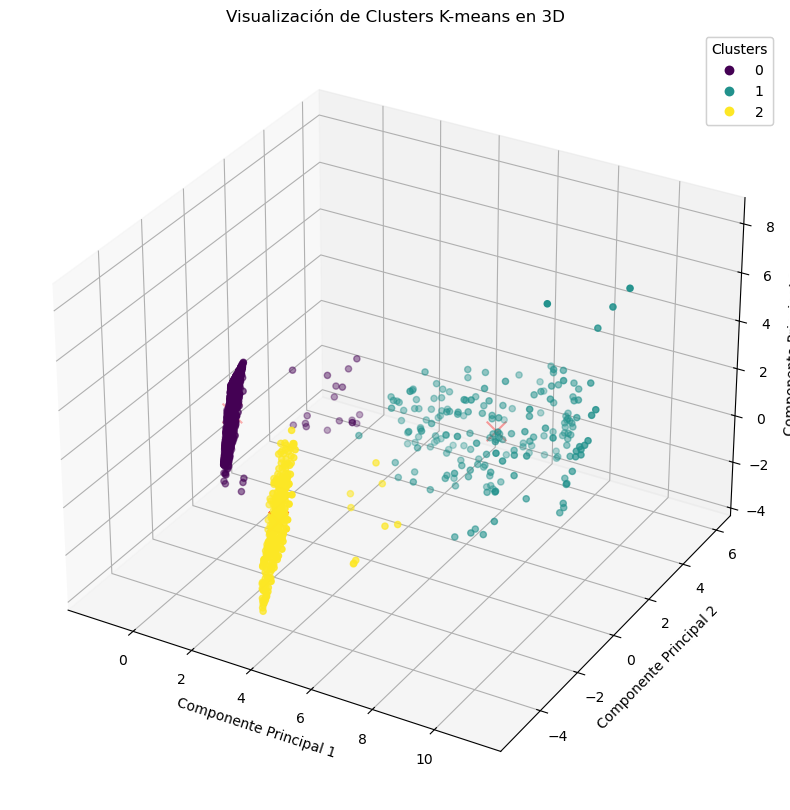


Tabla con resultados agrupados por cluster:
         Average Amount/transaction/day  Transaction_amount  Is declined  \
Cluster                                                                    
0                            510.248513         7620.888946     0.001169   
1                            590.337480        20214.855778     0.245000   
2                            505.945555        21961.475618     0.016234   

         Total Number of declines/day  isForeignTransaction  \
Cluster                                                       
0                            0.463966              0.146864   
1                            1.675000              0.330000   
2                            4.603896              0.853896   

         isHighRiskCountry  Daily_chargeback_avg_amt  6_month_avg_chbk_amt  \
Cluster                                                                      
0                 0.000000                  2.809505              1.236073   
1                 0.1400

In [612]:
classification()

# agrupamientos con 2 clusters

K-means ha sido aplicado con 2 clusters.

Centroides encontrados:
Cluster 0: [-0.01637104 -0.22257557 -0.12876432 -0.22510262 -0.19670726 -0.26726124
 -0.25618468 -0.24872046 -0.24279253 -0.40964832 -0.42208217]
Cluster 1: [0.0827253  1.12470767 0.65066537 1.1374772  0.99399121 1.35051104
 1.29453949 1.25682169 1.22686697 2.07001423 2.13284433]


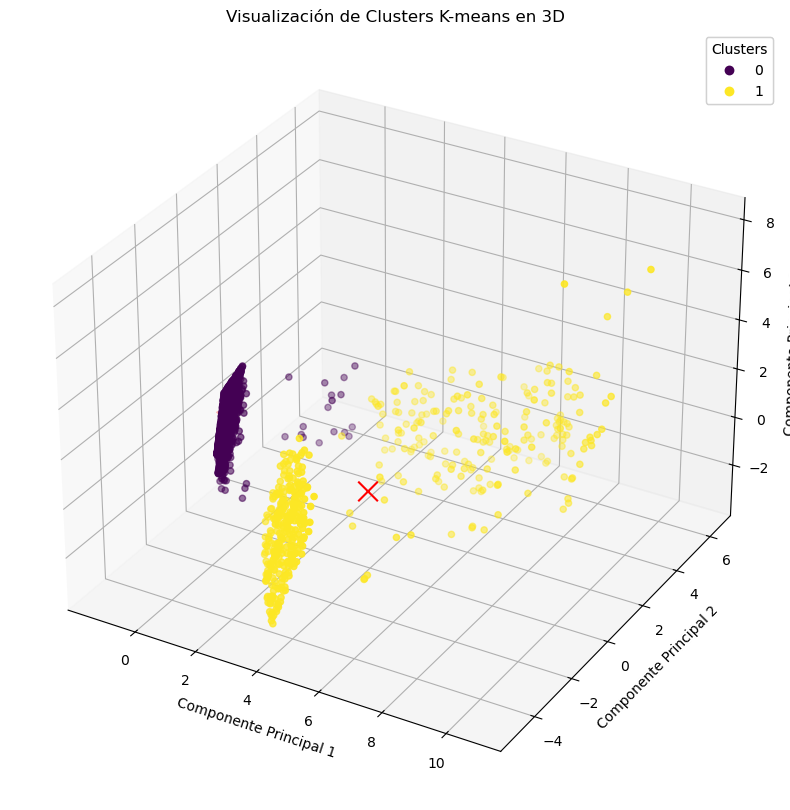


Tabla con resultados agrupados por cluster:
         Average Amount/transaction/day  Transaction_amount  Is declined  \
Cluster                                                                    
0                            510.248513         7620.888946     0.001169   
1                            539.170723        21273.830012     0.106299   

         Total Number of declines/day  isForeignTransaction  \
Cluster                                                       
0                            0.463966              0.146864   
1                            3.450787              0.647638   

         isHighRiskCountry  Daily_chargeback_avg_amt  6_month_avg_chbk_amt  \
Cluster                                                                      
0                 0.000000                  2.809505              1.236073   
1                 0.403543                323.190945            236.015551   

         6-month_chbk_freq  isFradulent  
Cluster                                  


In [613]:
classification(2)

# otras tipos de agrupamientos 

In [604]:
def classification_with_dbscan(eps=0.5, min_samples=5):
    # Primero, convierte los datos
    data_for_clustering = df
    
    # Escalar los datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_for_clustering)
    
    # Aplicar DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data_scaled)
    
    # Asignar los resultados al DataFrame
    df['Cluster'] = clusters
    
    # Mostrar la cantidad de puntos en cada cluster
    unique_clusters, counts = np.unique(clusters, return_counts=True)
    cluster_counts = dict(zip(unique_clusters, counts))
    print(f"Número de puntos en cada cluster: {cluster_counts}")
    
    # Mostrar tabla con los resultados agrupados por cluster
    results = df.groupby('Cluster').mean()
    
    print("\nTabla con resultados agrupados por cluster:")
    print(results)

In [596]:
classification_with_dbscan()

Número de puntos en cada cluster: {-1: 445, 0: 10, 1: 35, 2: 19, 3: 7, 4: 9, 5: 9, 6: 6, 7: 10, 8: 6, 9: 5, 10: 6, 11: 2154, 12: 340, 13: 14}

Tabla con resultados agrupados por cluster:
         Average Amount/transaction/day  Transaction_amount  Is declined  \
Cluster                                                                    
-1                           593.992526        21408.615538      0.12809   
 0                           106.077307         3644.042868      0.00000   
 1                           265.098942        11633.209519      0.00000   
 2                           765.820374        36850.882131      0.00000   
 3                           235.122557         9731.734303      0.00000   
 4                            54.292175         2465.451405      0.00000   
 5                           469.158550        20267.010520      0.00000   
 6                           247.293664         7565.395022      0.00000   
 7                           506.827391        18520.

In [597]:
def classification_with_mean_shift(bandwidth=None):
    # Primero, convierte los datos
    data_for_clustering = df
    
    # Escalar los datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_for_clustering)
    
    # Aplicar Mean Shift
    mean_shift = MeanShift(bandwidth=bandwidth)  # `bandwidth` es un parámetro opcional
    clusters = mean_shift.fit_predict(data_scaled)
    
    # Asignar los resultados al DataFrame
    df['Cluster'] = clusters
    
    # Mostrar la cantidad de puntos en cada cluster
    unique_clusters, counts = np.unique(clusters, return_counts=True)
    cluster_counts = dict(zip(unique_clusters, counts))
    print(f"Número de puntos en cada cluster: {cluster_counts}")
    
    # Mostrar tabla con los resultados agrupados por cluster
    results = df.groupby('Cluster').mean()
    
    print("\nTabla con resultados agrupados por cluster:")
    print(results)

In [598]:
classification_with_mean_shift()

Número de puntos en cada cluster: {0: 2509, 1: 175, 2: 81, 3: 39, 4: 48, 5: 46, 6: 27, 7: 24, 8: 15, 9: 15, 10: 7, 11: 7, 12: 9, 13: 5, 14: 4, 15: 5, 16: 4, 17: 7, 18: 3, 19: 3, 20: 3, 21: 2, 22: 3, 23: 2, 24: 2, 25: 2, 26: 1, 27: 1, 28: 1, 29: 2, 30: 1, 31: 4, 32: 3, 33: 1, 34: 3, 35: 1, 36: 1, 37: 1, 38: 3, 39: 1, 40: 1, 41: 3}

Tabla con resultados agrupados por cluster:
         Average Amount/transaction/day  Transaction_amount  Is declined  \
Cluster                                                                    
0                            508.983716         7570.797082          0.0   
1                            500.592693        21505.276669          0.0   
2                            574.044494        25608.927012          0.0   
3                            630.874555        11337.770999          0.0   
4                            476.043991         6589.942716          0.0   
5                            414.348081        17934.970940          0.0   
6              